<a href="https://colab.research.google.com/github/dretcm/Machine-Learning-ACM/blob/main/Platzy_ML_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  New Fibonacci Dinamic

In [ ]:
import sys

def fibonacci_dinamico(num, memo = {}):
  if num == 0 or num == 1:
    return 1
  try:
    return memo[num]
  except KeyError:  # error cuando no se encuentra la llame o el Key en el diccionario
    resultado = fibonacci_dinamico(num - 1) + fibonacci_dinamico(num - 2)
    memo[num] = resultado
    return resultado
# ya no se tendra que calcular los valores denuevo, sino que se almacenaran en "memo"   o un diccionario

if __name__ == '__main__':
  sys.setrecursionlimit(10002) # se define 10 002 en recursividad para no afectar a funciones extra
  print(fibonacci_dinamico(5000))

6276302800488957086035253108349684055478528702736457439025824448927937256811663264475883711527806250329984690249846819800648580083040107584710332687596562185073640422286799239932615797105974710857095487342820351307477141875012176874307156016229965832589137779724973854362777629878229505500260477136108363709090010421536915488632339240756987974122598603591920306874926755600361865354330444681915154695741851960071089944015319300128574107662757054790648152751366475529121877212785489665101733755898580317984402963873738187000120737824193162011399200547424034440836239726275765901190914513013217132050988064832024783370583789324109052449717186857327239783000020791777804503930439875068662687670678802914269784817022567088069496231111407908953313902398529655056082228598715882365779469902465675715699187225655878240668599547496218159297881601061923195562143932693324644219266564617042934227893371179832389642895285401263875342640468017378925921483580111278055044254198382265567395946431803304304326865077

# Probability
probabilidad de tirar 2 datos en N intentos y N tiros y que salga 12.

In [ ]:
import random

def lanzar_dado(num_tiros):
  intento_tiros = []
  for _ in range(num_tiros):
    dado1 = random.choice([1,2,3,4,5,6])
    dado2 = random.choice([1,2,3,4,5,6])
    intento_tiros.append(dado1+dado2)
  return intento_tiros

def main(num_tiros, num_intentos):
  tiros=[]

  for _ in range(num_intentos):
    tiros.append(lanzar_dado(num_tiros))
  
  con_1 = 0
  for i in tiros:
    if 12 in i:
      con_1 += 1
  print(f" probabilidad de que toque 1 en {num_tiros} con el numero de intentos de {num_intentos} es: {con_1/num_intentos}")

if __name__ == '__main__':
  main(10,10000)


 probabilidad de que toque 1 en 10 con el numero de intentos de 10000 es: 0.2418


# Media, Variance, and Standar Deviation
u = media = ( 1 / n ) * sum(X)

varianza = ( 1 / n ) * ((x - u)**2)

desviacion estandar = sqrt(varianza)

![alt text](https://economipedia.com/wp-content/uploads/Desviaci%C3%B3n-est%C3%A1ndar.png)


In [ ]:
import random
import math

def Media(X):
  return sum(X) / len(X)

def Variance(X):
  mu = Media(X)

  con_variance = 0

  for x in X:
    con_variance += (x-mu)**2

  return con_variance/len(X)

def Standar_Deviation(X):
  return math.sqrt(Variance(X))

if __name__ == '__main__':
  X = [random.randint(1,20) for _ in range(20)]
  print(f" array: {X}")
  print(" media: ",Media(X)," variance: ",Variance(X)," Standar Deviation: ",Standar_Deviation(X))

 array: [9, 9, 16, 12, 7, 11, 5, 10, 8, 20, 14, 9, 9, 7, 11, 20, 5, 3, 12, 2]
 media:  9.95  variance:  22.5475  Standar Deviation:  4.748420790115383


# Normal Distribution

![alt text](https://static.platzi.com/media/user_upload/myimag-12adbb93-d42b-4428-af96-4f622c96ed81.jpg)

# MonteCarlo Simulation

In [ ]:
import random
import collections

CARDS = ["Diamond","Clover","Heart","Swords"]
VALUES = ["as","2","3","4","5","6","7","8","9","10","Jacks","Queen","King"]

def join_cards():
  deck_cards = []
  for i in CARDS:
    for f in VALUES:
      deck_cards.append((i,f))
  return deck_cards

def get_hand(cards,num):
  hand = random.sample(cards,num)
  return hand

def main(cards,num,num_try):
  hands = []

  for i in range(num_try):
    hands.append(get_hand(cards,num))

  pair = 0

  for hand in hands:
    values = []
    for val in hand:
      values.append(val[1])
    counter = dict(collections.Counter(values))
    
    for val in counter.values():
      if val == 2:
        pair += 1
        break # el break solo terminara este loop no el for mayor.

  probability_pair = pair / num_try
  print(f" probability of have a pair in a hand of {num} deck cards in {num_try} trys is : {probability_pair}")

if __name__ == "__main__":
  cards = join_cards()
  main(cards,5,1000)


# Calculation PI

In [ ]:
import random
import math

def throw_needles(num_needles):
  indoor_of_circle = 0
  for _ in range(num_needles):
    x = random.random() * random.choice([-1,1])
    y = random.random() * random.choice([-1,1])
    distance = math.sqrt(x**2 + y**2)
    if ( distance < 1 ):
      indoor_of_circle += 1

  return (4 * indoor_of_circle) / num_needles

def estimate(num_needles, num_try):
  estimated = []
  for _ in range(num_try):
    estimated.append(throw_needles(num_needles))
  
  media = Media(estimated)
  sigma = Standar_Deviation(estimated)
  print(f" media: {round(media,5)}  standar deviation: {round(sigma,5)} with {num_needles} needles. ")
  return (media,sigma)

def estimate_pi(precision, num_try):
  num_needles = 1000
  sigma = precision

  while sigma >= precision/1.96:
    media, sigma = estimate(num_needles, num_try)
    num_needles *= 2

  return media

if __name__ == '__main__':
  print(estimate_pi(0.01,1000))

 media: 3.14296  standar deviation: 0.05059 with 1000 needles. 
 media: 3.14107  standar deviation: 0.03603 with 2000 needles. 
 media: 3.14189  standar deviation: 0.02565 with 4000 needles. 
 media: 3.14313  standar deviation: 0.01741 with 8000 needles. 
 media: 3.14151  standar deviation: 0.01285 with 16000 needles. 
 media: 3.14177  standar deviation: 0.00951 with 32000 needles. 
 media: 3.14157  standar deviation: 0.00671 with 64000 needles. 


KeyboardInterrupt: ignored

# Muestreo or sampling

El muestreo es muy importante cuando no tenemos acceso a toda la población que queremos explorar. Uno de los grandes descubrimientos de la estadística es que las muestras aleatorias tienden a mostrar las mismas propiedades de la población objetivo. Hasta este punto todos los muestreos que hemos hecho son de tipo probabilísticos.

En un muestreo aleatorio cualquier miembro de la población tiene la misma probabilidad de ser escogido.

En un muestreo estratificado tomamos en consideración las características de la población para partirla en subgrupos y luego tomamos muestras de cada subgrupo, esto incrementa la probabilidad de que el muestreo sea representativo de la población.

# Prejuicio en el muestreo

para que la informacion sobre un cierto grupo sea correcto, primero debemos tener aleatoriedad y representatividad, en otras palabras un muestreo aleatorio y estratificado.

ejemplo:

Es como esas encuestas de Twitter donde todos los de X ideología le dan a compartir lo mas posible, y al final quienes respondieron la encuesta fue un grupo homogéneo( precisamente quienes adhieren a esas ideas )

Y después, esa encuesta la usan como argumento para validar su creencia, es como un circulo de auto regocijo y validación .__.


#Falacia del Francotirador de Texas

La falacia del francotirador (también llamada falacia del francotirador de Texas) es una falacia lógica donde la información que no tiene relación alguna es interpretada, manipulada o maquillada hasta que ésta parezca tener un sentido.

como ejemplo se ve al francotirador que despues de disparar a un tablero sus disparos, repito "despues", comienza a dibujar la diana para decir que le dio en el blanco o que sus tiros fueron precisos.

para evitar esto, primero se debe tener una hipotesis y luego tenemos que recolectar datos, para así sacar una conclusion.


# Teorema del Limite Central

https://www.youtube.com/watch?v=z2V1LX8tK7U&feature=youtu.be

# ¿Cómo trabajar con datos experimentales?

Los datos experimentales son aquellos que se generan a través del método científico.

Con el método científico es necesario comenzar con una teoría o hipótesis sobre el resultado al que se quiere llegar.
Basado en la hipótesis se debe crear un experimento para validad o falsear la hipótesis.
Se valida o falsea una hipótesis midiendo la diferencia entre las mediciones experimentales y aquellas mediciones predichas por la hipótesis.

# Regresion Linear o Linear Regression

In [ ]:
import numpy as np
x = np.array([0,1,2,3,4,5,6,7,8]) # datos
y = np.array([1,2,3,5,4,6,8,7,9]) # resultados experimentales

coeffs = np.polyfit(x,y,1) # polinomio de grado 1
print(coeffs)

m = coeffs[0]
b = coeffs[1]

est_y = (m * x) + b

[0.96666667 1.13333333]


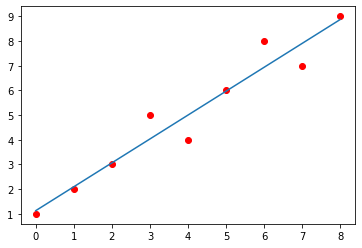

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,est_y)
plt.scatter(x,y,color="red")
plt.show()

# Introducion a  la programacion probabilistica

La programación dinámica probabilística (PDP) es una técnica matemáticamente útil para la toma de decisiones interrelacionadas, se presenta cuando el estado en la siguiente etapa no está determinado por completo por el estado y la política de decisión de la etapa actual.

segun el ejemplo del musico, cuando se agregue el determinante de adicion "y", se generara un subconjunto del conjunto musico, siendo el subconjunto musicos y drogas.
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/DosConjuntos206.svg/1200px-DosConjuntos206.svg.png)
A = musicos

B = musicos y drogas

C = musicos, drogas y pokemon ( seria un subconjunto de B)


# Probabilidad Condicional

cuando no sean eventos independientes usaremos esta formula:

P(A) = P(B)P(A | B) + P(┐B)P(A | ┐B)

P(A | B )P(B) = P(B | A)P(A)

P(drogas) = P(musico)P(drogas | musico) + P( ┐musico)P(drogas | ┐musico)

P(cancer) = P(positivo)P(cancer | positivo) + P (negativo)P(cancer | negativo)

# Teorema de Bayes

![alt text](https://www.fhybea.com/herramientas/imagenes_articulos/teorema-bayes/teorema-bayes.png)

# Ejemplo
"Un taxi estuvo involucrado en un atropello y se escapó en la noche. En la ciudad operan dos compañías, los taxis Verdes y los taxis Azules. Conocemos la siguiente información:

a) El 85% de los taxis son Verdes y el 15% son Azules
b) Un Testigo identificó el taxi Azul como el causante del atropello. La corte realizó pruebas de confiabilidad del testigo bajo las mismas circunstancias que existían la noche del accidente y concluyeron que el testigo identificaba correctamente uno de los dos colores el 80% de las veces y fallaba en el 20% de las veces.

¿Cuál es la probabilidad qué el taxi involucrado en el accidente fuera Azul en lugar de Verde?”

Sabiendo que se ha demostrado que el testigo tiene razón el 80% del tiempo, identificando cuando el Taxi es Verde y cuando el taxi es Azul, muchos de los miembros del jurado les parecería que el taxi tiene una probabilidad de 80% de ser del color que el testigo dijo (Azul). La distribución de los taxis en la ciudad parece haberse considerado irrelevante.

La probabilidad que se debe conocer es: P(Taxi sea Azul | Testigo dijo que era Azul)

Hipótesis = El Taxi es Azul

Evidencia = El testigo dijo que el taxi era azul

![alt text](https://static.platzi.com/media/user_upload/Teorema%20de%20Bayes-8d7d6dff-e2e1-4a71-81c6-5772aa93f0a7.jpg)

La probabilidad que el taxi sea azul dado que el testigo dijo que era azul es del 41,4% y no del 80% como los testigos les parecería simple vista sin tener en cuenta las proporciones.

In [ ]:
def calculate_bayes(prior_A, prob_B_dado_A, prob_B):
  return (prior_A * prob_B_dado_A) / prob_B

if __name__ == '__main__':
  prob_cancer = 1 / 100000
  prob_sintoma_dado_cancer = 1
  prob_sintoma_dado_no_cancer = 10 / 99999
  prob_no_cancer = 1 - prob_cancer

  prob_sintoma = (prob_cancer * prob_sintoma_dado_cancer) + (prob_no_cancer * prob_sintoma_dado_no_cancer)

  prob_cancer_dado_sintoma = calculate_bayes(prob_cancer,prob_sintoma_dado_cancer, prob_sintoma)

  print(prob_cancer_dado_sintoma)

0.09090909090909091


![alt text](https://static.platzi.com/media/user_upload/Teoremas%20de%20Bayes-4d9e1a78-07f1-4452-aae5-9f76c182f3d3.jpg)

![alt text](https://static.platzi.com/media/user_upload/symptoms_2-e5d421a8-ab16-4c43-b538-a5a3b921923d.jpg)

# Aplicaciones del TB

https://platzi.com/clases/1841-probabilistica/26581-aplicaciones-del-teorema-de-bayes/

“Cuando los hechos cambian, yo cambio mi opinión. ¿Qué hace usted, señor?”

# Garbage in, Garbage out (GiGo)

si ingresas basura te devolvera basura, al igual que el cuerpo humano, donde si no alimentamos a nuestro cuerpo ya sea fisicamente o mentalmente, al final eso nos retornara la desgracia, un cuerpo mediocre, o la ignorancia como los los comentarios que estoy haciendo ahora.

Notas:
Existe un tercer nivel de bugs, que son aquellos que vienen de la forma en la que pensamos para llegar a conclusiones.

Garbage in-out:
Se refiere a que si nuestros datos de entrada son basura(incorrectos) obtendremos resultados basura.
Recuerda:
La calidad de nuestros datos es igual de importante que la presión de nuestro computo.

Frases:
“En dos ocasiones me han preguntado (miembros del parlamento)
'Disculpe Sr.Babbage si introducimos en la maquina números incorrectos ¿La respuesta correcta saldrá?. Me cuesta trabajo apreciar la confusión de ideas quer pueden provocar dichas preguntas” -Charles Babbage

# Imagenes Engañosas

Como saber si es incorrecta:

Escala incorrecta para la evaluacion, o no tiene labels, etiquetas.

Ejemplo:

Donde se aprecia que el primero tiene una escala incorrecta de los datos, y en la segunda se aprecia la importancia de tener un buena escala de datos, un gran cambio verdad.

![alt text](https://static.platzi.com/media/user_upload/EVhHBRPX0AEcweS-b3674098-a1f9-4848-b42f-ed2fcc51fc72.jpg)


para saber mas o mejorar reportes de grafica:

https://books.google.com.bo/books?id=retRCgAAQBAJ&printsec=frontcover&dq=Storytelling+with+Data&hl=es-419&sa=X&ved=0ahUKEwiyy5Pv7q_pAhU0GbkGHXsvB8UQ6AEIJjAA#v=onepage&q=Storytelling with Data&f=false

# Cum Hoc Ergo Propter Hoc(Después de esto, eso; entonces a consecuencia de esto, eso.)

en todas las relaciones que veamos, donde pensemos que hay una causalidad, tratemos de pensar que otros factores, variables escondidas que no estemos viendo hay, antes de saltar a un resultado o conclusion.

# Porcentajes Confusos

donde solo te muestra ciertos porcentajes, pero no el contexto.

como ejemplo, se dice que escuela A aumento un 25% su tasa de aprendisaje, y que la escuela B un 5%.

cualquiera diria que debo ingresar a mi hijo a la escuela A y blablabla etc.

pero no se muestra el contexto en el cual esta el rendimiento de cada escuela, es decir, que en el 2019 la escuela A tubo un 20% de rendimiento academico y la B un 95%, y ahora en el 2020 la A aumento en un 25%, es decir su incremento fue de 5, y en la escuela B en el 2020 su aumento fue del 5%, osea su incremento es de 5, y al final en el 2020 la escula A tendria un 25% de rendimiento academico, y la escuela B un 100% de rendimiento academico.


# Falacia de regresion

Muchos eventos fluctuan naturalmente, por ejemplo, la temperatura promedio de una ciudad, el rendimiento de un atleta, etc.

Si ocurre una situacion extrema no significa que vaya a ocurrir un rebote hacia la situacion extrema contraria, sino que se tiende a volver a la media.

Cuando algo fluctua y se aplican medidas correctivas se puede creer que existe un vinculo de causalidad en lugar de una regresion a la media

# Conclusiones:

![alt text](https://static.platzi.com/media/user_upload/platzidoro-2ac6015f-0309-4506-9640-0486dfe40937.jpg)

# Introduccion a  Machine Learning

Machine learning se utiliza cuando:

El problemas es muy complejo y no se conoce un algoritmo para solucionarlo.

-Ayudar a los humanos a entender patrones.

-Llegar a conclusiones de manera automática a través de computo

Notas:
El aprendizaje no supervisado es el no etiquetado, el supervisado pues el etiquetado, y el semisupervisado o el de apollo, como ejemplo seria, supervisado(profesor a alumnos), no supervisado(un autodidacta), y semisupervisado(como un amigo cuando te caes, o necesitas ayuda).

El aprendizaje puede ser bach( se genera una vez y se aplica solo esa vez). O el online learning(donde el modelo se actualiza conforme obtiene datos).

Los humanos memorizamos y generalizamos aprendizajes, al igual que algunos algoritmos de machine learning.

Rara vez utilizaremos los algoritmos de Machine learning de manera directa, más bien lo harás a través de librerías, pero es bueno saber como funcionan.

# Feacture Vectors:

Se utilizan para representar características simbólicas o numéricas.
Permiten analizar un objeto desde una perspectiva matemática.

Nos permite definir cuales son los elementos importantes para un algoritmo y cuales no lo son.

Son usados en reconocimiento de voz, procesamiento de imagen, detección de spam, etc.

Recuerda:
Si tu vector tiene muchos valores “inrelevantes”, lo más probable es que tengas basura(principio de Garbage in Garbage out, GiGo).

# Metricas de Distancia

![alt text](https://static.platzi.com/media/user_upload/Captura-3d4c3a6e-7fbe-4df3-92ee-54e73169daea.jpg)

![alt text](https://static.platzi.com/media/user_upload/1200px-Manhattan_distance.svg-73a45cc6-701b-4f74-99bb-f4464ea42ec2.jpg)

Linea Roja = Métrica Binaria

Linea Verde = Métrica Euclidiana

Linea Amarilla y Azul = Métrica de Manhattan

# Introduccion al Agrupamiento

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

# Agrupamiento Jerarquico

10


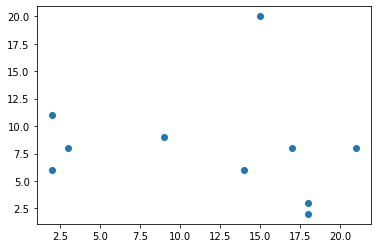

In [ ]:
import random
import math
import matplotlib.pyplot as plt

rango = 10
x = [random.randint(1,21) for _ in range(rango)]
y = [random.randint(1,21) for _ in range(rango)]
print(len(x))
plt.scatter(x,y)
plt.show()

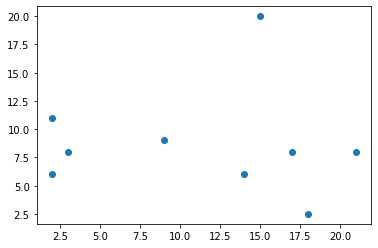

In [ ]:
def distance(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2) # distancia euclideana

def media(x1,y1,x2,y2):
  return (x1+x2)/2, (y1+y2)/2

def clear_data(x,y,xy1,xy2):
  new_x = []
  new_y = []
  for i in range(len(x)):
    if i != xy1 and i != xy2:
      new_x.append(x[i])
      new_y.append(y[i])
  return new_x, new_y

def new_average_link(points_x,points_y):
  min = 10000

  for i in range(len(points_x)):
    for f in range(len(points_x)):
      dist = distance(points_x[i],points_y[i],points_x[f],points_y[f]) # retorna la distancia de los puntos
      if dist < min and dist != 0:
        min = dist
        xy1 = i
        xy2 = f

  new_x, new_y = media(points_x[xy1],points_y[xy1], points_x[xy2], points_y[xy2]) # nuevo average linkench

  points_x.append(new_x)
  points_y.append(new_y)

  points_x, points_y = clear_data(points_x,points_y,xy1,xy2) # eliminamos los dos puntos que conforman el AL(average linkench)

  return points_x, points_y

x, y = new_average_link(x,y)

plt.scatter(x,y)
plt.show()

# Agrupamiento de K-means

https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/

Se generan puntos aleatorios y la cantidad es definida por el "K" y se les llama centroides, despues se promedia todos los puntos que pertenecen al centroide para encontrar el centro de esos grupos y el centroide se vuelve a posicionar, y se repite ese proceso varias veces hasta que el centroide no cambie de posicion.

k-means es un algoritmo de aprendisaje no supervisado.

![alt text](https://histalk2.com/wp-content/uploads/2018/10/kmeans_thumb.gif)

# Técnicas de agrupamiento
​
El agrupamiento es una técnica de Machine Learning que consiste, en pocas palabras, en dividir una población en grupos con la consecuencia de que los datos en un grupo son más similares entre ellos que entre los otros grupos.
​
Imagina que eres el dueño de una startup que hace ecommerce y quieres tener estrategias de venta para tus clientes. Es casi imposible diseñar una estrategia por cada individuo, pero se puede utilizar el agrupamiento para dividir a los clientes en grupos que tengan similitudes relevantes y así reducir el problema a unas cuantas estrategias.
​

**Existen dos tipos de agrupamiento:**
​

**Agrupamiento estricto (hard clustering):** en el cual cada dato pertenece a un grupo u otro. No hay puntos medios.

**Agrupamiento laxo (soft clustering):** en el cual en lugar de asignar un dato a un grupo, se asigna probabilidades a cada dato de pertenecer o no a un grupo.
​
Un punto muy importante que debes considerar cuando ejecutas técnicas de agrupamiento es que debes definir muy claro a qué te refieres cuando hablas de similitud entre puntos, porque esto puede ayudarte a definir el algoritmo correcto para tus necesidades particulares.
​

*   A grandes rasgos existen cuatro aproximaciones para definir similitud:


**Modelos conectivos:** Estos modelos asumen que los puntos más similares son los 
que se encuentran más cercanos en el espacio de búsqueda. Recuerda que este espacio puede ser altamente dimensional cuando tus feature vectors definen muchas características a analizar. Una desventaja de este tipo de modelos es que no escalan para conjuntos de datos grandes (aunque es posible utilizar una muestra y aplicar técnicas de estadística inferencial para obtener resultados).

**Modelos de centroide:** Este tipo de modelos definen similitud en términos de cercanía con el centroide del grupo. Los datos se agrupan al determinar cuál es el centroide más cercano.

**Modelos de distribución:** Este tipo de modelos trata de asignar probabilidades a cada dato para determinar si pertenecen a una distribución específica o no (por
ejemplo, normal, binomial, Poisson, etc.).

**Modelos de densidad:** Estos modelos analizan la densidad de los datos en diferentes regiones y dividen el conjunto en grupos. Luego asignan los puntos de acuerdo a las áreas de densidad en las que se haya dividido el dataset.

​
Acuérdate que no tienes que casarte con un modelo específico. Muchos de los mejores Ingenieros de Machine Learning y Científicos de Datos utilizan varios modelos con el mismo conjunto de datos para analizar el rendimiento de los diversos algoritmos que tienen a su disposición. Así que experimenta y siempre compara tus resultados antes de tomar una decisión.

LINK PARA MAS INFORMACION SOBRE AGRUPAMIENTOS: https://medium.com/datos-y-ciencia/aprendizaje-no-supervisado-en-machine-learning-agrupaci%C3%B3n-bb8f25813edc#:~:text=Para%20ello%2C%20los%20algoritmos%20de,con%20los%20de%20cl%C3%BAsteres%20diferentes.&text=Modelo%20de%20Agrupamiento%20Gaussiano


LINK CODO, ETC: https://jarroba.com/seleccion-del-numero-optimo-clusters/


Automatically created module for IPython interactive environment


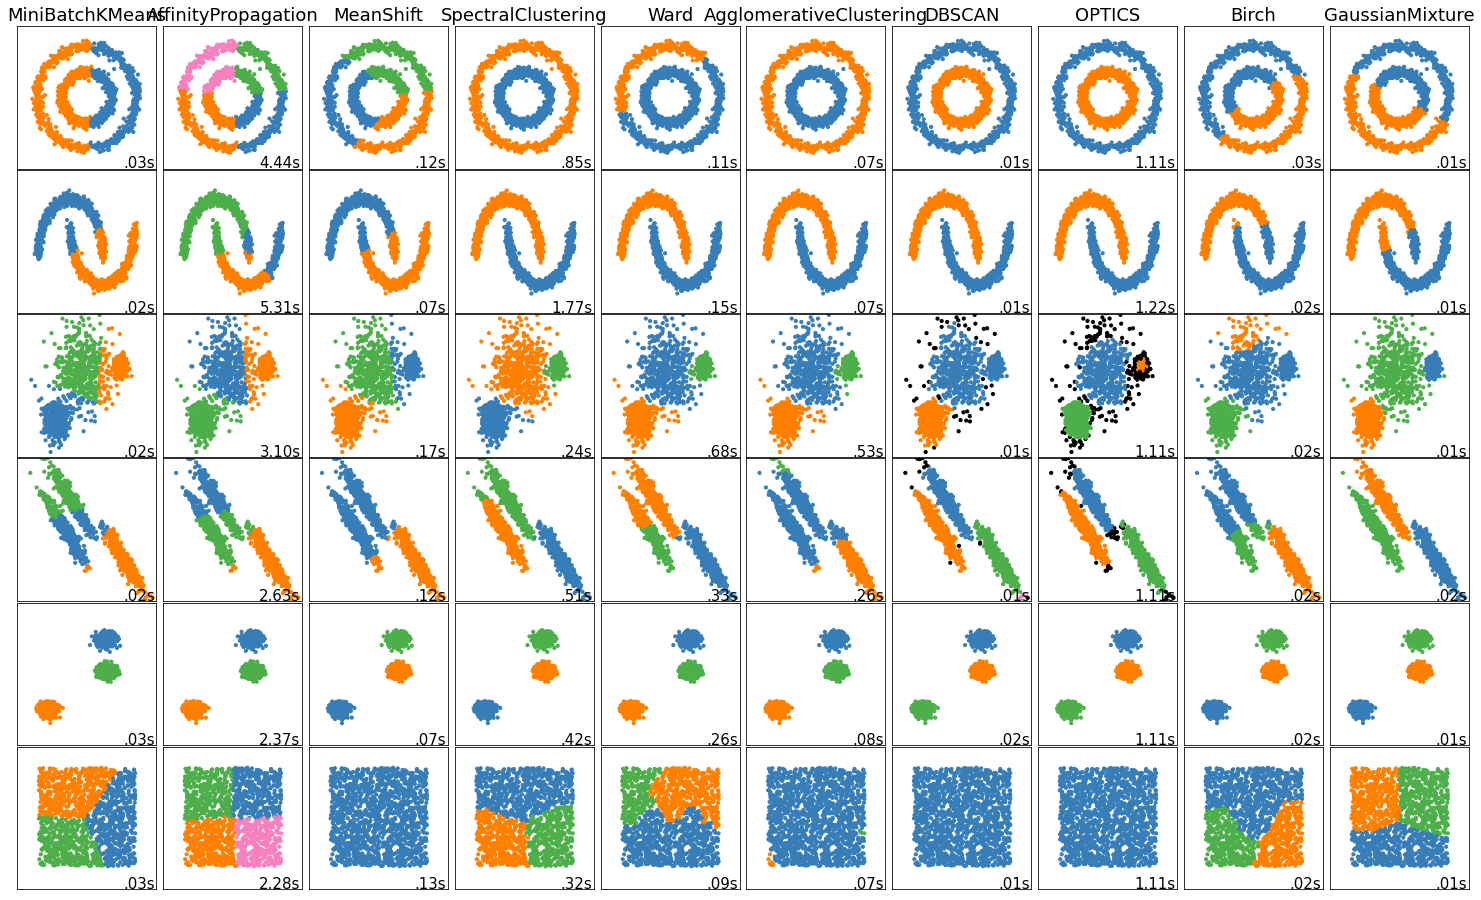

In [ ]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Introduccion a la Clasificacion

Resumen: El clustering lo usamos cuando no tenemos ni idea de que clase de grupos puede haber dentro del dataset, entonces necesitamos que nuestro algoritmo genere esos grupos. Y la clasificacion la usamos cuando nosotros sabemos que grupo necesitamos y queremos que nuestro algoritmo nos diga que datos son los que estan dentro de este grupo.
Puede que me haya equivocado jajaja

Notas:

La clasificación es el modelo el cual predice la clase de cierto dato.
-Es de aprendizaje supervisado, lo que quiere decir que usa etiquetas(labels) y un modelo de aprendizaje.A diferencia de el agrupamiento que es todo lo contrario, partimos del data set y no usamos etiquetas.

Pasos de la clasificación:

1.Aprendizaje(Creación del data set)
2.Clasificación

Dato:
Las redes neuronales funcionan en un modelo de agrupamiento y clasificación.

**ejemplo de clasificacion:**

![alt text](https://static.platzi.com/media/user_upload/1-3d661ccc-2591-4074-829c-153ce994e2f8.jpg)

![alt text](https://blog.bismart.com/hs-fs/hubfs/Imported_Blog_Media/ClassificationAndClustering/Clustering&clasification-Animales.gif?clasification-Animales.gif&width=800&name=Clustering&clasification-Animales.gif?clasification-Animales.gif)

LINK Clasificacion vs Clusterizacion:
https://blog.bismart.com/es/la-clasificaci%C3%B3n-y-la-clusterizaci%C3%B3n-una-explicaci%C3%B3n-pr%C3%A1ctica

# K-NN (K - NEAREST NEIGHBORS)

En el caso de un k = par, deberiamos sumar las distancias de los grupos y determinar cual es la menor para el elemento nuevo.

Ejemplo gif:

![alt text](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

Ejemplo con k = 5:

![alt text](https://static.platzi.com/media/user_upload/westeros%20y%20dothraki-2d95daac-1d19-4b0f-aaf1-581210256920.jpg)


# Técnicas de clasificación
​
La clasificación es un tipo de Machine Learning supervisado. Esto significa que para entrenar un modelo necesitamos un conjunto de datos (dataset) que ya tenga etiquetas (labels) para poder entrenar nuestros modelos.
​

La mejor forma de pensar en algoritmos de clasificación es pensar en el sombrero clasificador de Harry Potter. Cuando un nuevo alumno de Hogwarts entra a la escuela es necesario asignarlo/clasificarlo en una de las 4 casas. El sombrero obtiene los datos cuando se lo coloca el alumno y define cuál es el mejor match para su caso particular. Aquí estamos asumiendo que el sombrero es un algoritmo que ya ha sido entrenado y que los alumnos son nuevos data points que tienen que ser clasificados.
​

**Clasificadores lineales**
​

Estos tipos de clasificadores se distinguen porque dividen el conjunto de datos con una línea (que puede ser multidimensional dependiendo de la cantidad de features que hemos utilizado para definir a nuestros datos). Esto genera áreas dentro de nuestro espacio de búsqueda para que cuando coloquemos un nuevo dato podamos clasificarlo fácilmente.
​

El problema con este tipo de modelos es que son pocos flexibles cuando el conjunto de datos no puede ser separado fácilmente con una simple línea; por ejemplo, cuando necesitáramos una figura más compleja para dividirlo (como un polígono).
​

**Regresión logística**
​

Estos algoritmos se parecen mucho a los clasificadores lineales, con la diferencia de que no se divide simplemente con una línea, sino con un gradiente que determina la probabilidad de que un punto pertenezca a una categoría u otra. Es decir, la gradiente determina la probabilidad de que un punto sea asignado a una categoría y mientras un dato se aleje más en una dirección será mayor la probabilidad de que pertenezca a una categoría.
​

Imagina que estos algoritmos generan un área difusa en la que no estamos seguros de la clasificación y un área clara en la que tenemos un alto grado de certeza en cuanto a la categoría que pertenece un punto.
​

**Nearest neighbor**
​

Los modelos que utilizan nearest neighbor se apoyan de los datos que ya han sido clasificados para determinar la distancia entre sus “vecinos más cercanos.” El algoritmo más común que utiliza esta técnica se llama K-nearest neighbors y la K representa el número de vecinos que se utilizarán para clasificar los datos. En pocas palabras, se identifican los datos más cercanos y en el caso más sencillo se hace una votación simple (por ejemplo, 5 azules, 2 rojos, por lo tanto azul).
​

Una característica de estos modelos es que “dibujan” una línea que se asemeja a una costa para clasificar los datos. Mientras K sea más grande la “línea costera” se alisa y se asemeja más y más a una línea simple. Por lo tanto, la definición de K tiene un impacto importante en el desempeño de nuestro algoritmo de clasificación.
​

**Support Vector Machines**
​

Estos algoritmos se diferencian por tener la habilidad de generar figuras complejas (polígonos) que pueden agrupar datos. Si la figura que tendríamos que dibujar para dividir nuestros datos es diferente a una línea (círculos, polígonos, etc.), entonces estos modelos son una buena opción.
​

**Árboles de decisión**


Este tipo de algoritmos nos permiten generar una árbol que tenemos que recorrer y tomar decisiones cada vez que avanzamos en un nivel. Por ejemplo:


Si un feature en análisis es mayor a 5, dibuja la línea y=2x+3, de lo contrario dibuja y=-3x+5
Si el feature siguiente es menor a 2, dibuja otra línea y así sucesivamente.
​

**Conclusiones**
​

Recuerda que la decisión de qué algoritmo utilizar depende de la forma en la que tengas tus datos y la precisión que desees obtener (a cambio de excluir o incluir falsos positivos y negativos). Otro punto a considerar es que estos algoritmos deben ser entrenados con datos previos y la calidad de estos datos y del modelo subsecuente importan mucho para obtener la mejor clasificación.

LINK PARA SABER MAS SOBRE MODELOS SUPERVISADO, NO SUPERVISADOS, ETC. EN SKLEARN:

https://scikit-learn.org/stable/user_guide.html

# Conclusiones Algoritmos de ML:

Al igual que en los algoritmos de agrupación, en los de clasificación también tenemos la posibilidad de usar más de un algoritmo para obtener mejores resultados y este dependerá también de cual es tu necesidad.